In [4]:
#Ваша задача построить сеть для произвольного семантического поля, где узлами будут слова, а ребрами наличие косинусного расстояния больше 0.5 в word2vec-модели. Вычислите самые центральные слова графа, его радиус (для каждой компоненты связности) и коэффициент кластеризации.
import sys
import gensim, logging
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
communicate_words_not_ann = [ "ощущать", "реагировать", "воспринимать", "замечать", "увидеть", "чувствовать", "почуять", "сознавать", "почувствовать", "щупать", "прикасаться", "ощупывать", "шарить", "дотрагиваться", "уцепиться"] 
communicate_words = [word+'_VERB' for word in communicate_words_not_ann]
nouns = ["ощущение", "чувство", "эмоция", "переживание"]
communicate_words.extend([ word+'_NOUN' for word in nouns])

In [6]:
G = nx.Graph()
G.add_nodes_from(communicate_words)

In [8]:
m = 'ruscorpora_upos_skipgram_300_5_2018.vec.gz'
if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

In [9]:
model.init_sims(replace=True)

In [10]:
near_dict = {}
for word in communicate_words:
    if word in model:
        if word not in near_dict:
            near_dict[word] = [sim_word[0] for sim_word in model.most_similar(word) if sim_word[1] > 0.5]            
    else:
        print('still not today')
        

In [11]:
for word in near_dict:
    print(word)
    for near_word in near_dict[word]:
        print(near_word)
        if near_word in communicate_words:
            G.add_edge(word, near_word)

ощущать_VERB
чувствовать_VERB
почувствовать_VERB
ощутить_VERB
ощутиться_VERB
чувствоваться_VERB
испытывать_VERB
ощущение_NOUN
ощущать_ADJ
почувствоваться_VERB
осознавать_VERB
реагировать_VERB
отреагировать_VERB
прореагировать_VERB
воспринимать_VERB
среагировать_VERB
реакция_NOUN
реакция_PROPN
откликаться_VERB
воспринимать_VERB
воспринять_VERB
восприниматься_VERB
воспринимать_ADJ
обостренно_ADV
восприятие_NOUN
реагировать_VERB
расценивать_VERB
соотносить_ADJ
интерпретировать_VERB
осознаваться_VERB
замечать_VERB
примечать_VERB
заметить_VERB
подмечать_VERB
приметить_VERB
видеть_VERB
догадываться_VERB
заметившый_VERB
дметить_VERB
приумолкнуть_NOUN
колосьин_PROPN
увидеть_VERB
увидать_VERB
видеть_VERB
завидеть_VERB
увидавать_VERB
видевать_VERB
обрень_PROPN
виденный_ADJ
видеть_NOUN
tiens_PROPN
представший_VERB
чувствовать_VERB
почувствовать_VERB
ощущать_VERB
сознавать_VERB
чувствоваться_VERB
ощутить_VERB
сознать_VERB
чувствовавать_VERB
чувствуть_VERB
чувствовавший_VERB
чувствовывать_VERB
почу

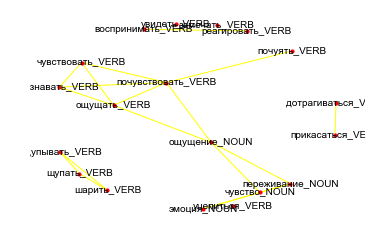

In [12]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=10) 
nx.draw_networkx_edges(G, pos, edge_color='yellow')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='Arial')
plt.axis('off') 
plt.show()

Дальше работа с параметрами графа

In [21]:
#Коэффициент кластеризации
print('Кластеризация: '+str(nx.average_clustering(G)))
#Центральные слова
deg = nx.degree_centrality(G)

for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid)
#Компоненты связности и радиусы
graphs = nx.connected_component_subgraphs(G)
for graph in graphs:
    print("Радиус: "+str(nx.radius(graph)))

Кластеризация: 0.4596491228070175
почувствовать_VERB
ощущать_VERB
ощущение_NOUN
чувствовать_VERB
сознавать_VERB
чувство_NOUN
переживание_NOUN
щупать_VERB
ощупывать_VERB
шарить_VERB
эмоция_NOUN
реагировать_VERB
воспринимать_VERB
почуять_VERB
прикасаться_VERB
дотрагиваться_VERB
замечать_VERB
увидеть_VERB
уцепиться_VERB
Радиус: 2
Радиус: 1
Радиус: 0
Радиус: 0
Радиус: 1
Радиус: 1
Радиус: 0
